# Overview

This is a model that brings together many aspects of astrophysics and cosmology, which is what is most fun about it! The motivation behind it was to try to explain observations of entropy and chemistry in the gas of galaxy clusters, which interestingly can be shaped by the many aspects discussed below.

While the model physics makes many simplifying assumptions and has many knobs to dial, the more complete way to tackle this problem is to run full cosmological N-body simlations which track billions of particles of dark matter and gas, and models the interactions between them through gravity, heating, cooling, etc. Therefore, the hope here is that this model makes up for its simplicity by flexibility to test many parameters and match them to the observations. 

Implementing the simplified physics, however, does not mean that the computational approach is straightforward. There is a nice level of complexity in the code, even if this work can be considered a first take to achieve its goals.

# TL;DR

<img src="a119xrayoptical_crop.png" align="right" width="350" />

- Galaxy clusters are large concentrations of mass, which are dominated by dark matter (~90% of the mass) hot gas that emits X-ray (10%).. oh and yes, galaxies (a few percents.)
- We can observe the galaxies with regular (optical) telescopes, and the gas with X-ray telescopes!
- Analyzing the spectrum of the X-ray gas tells us about its density, temperature, emtropy and chemical composition (a.k.a metallicity)
- I like 2 of these quantities. Why?
- Metallicity is the amount of heavy elements in the gas. (Heavier than Helium, that is.) Only stars and their subsequent supernovae can make these "metals." Therefore, measure the gas metallicity tells about the total number of stars in the past that could have created these metals.
- Entropy (unlike temperature) measures the amount of heat _added to_ (or subtracted from) the gas by processes like shock heating (when too blobs of gas collide,) supernova heating, among others. 
- The most dominant of these processes is gravitational shock heating, which happens when 2 clusters collide.
- Here's some good news: We know how often clusters merge. We know how much heat is generated in these mergers. We know how often supernovae went off as a function of the age of the universe. At least we have models for these!
- Let's put these two models together and see if we get the metallicity and entropy which measure in _actual_ galaxy clusters!

# Introduction

## Hierarchical Structure Formation

The universe is full of stars, galaxies, and groupings of the latter which we call galaxy clusters. It also contains groups of galaxy clusters, super-clusters. As we currently understand it, all this _structure_ has formed in a bottom-up way, where smaller objects have been merging together to form larger objects.

This model has been quantified through large many-body simulations, where the universe is modelled as many particles, which interact gravitationally over a background of an expanding universe as understood through Einstein's General Relativity. These simulations are generally very computationally expensive as they keep track of a large number of "particles." However, they produce "universes" which look like ours!

They are also able to compute the rates with which clusters of different masses form. And this is the result which I used to build my model. For a given cluster of mass $M$ at redshift $z$, this is the expected number of mergers from _smaller_ clusters of mass $\xi M$, per redshift interval $dz$ per mass fraction interval $d\xi$:

<p style="text-align:center">$\frac{d^2N}{dz d\xi} = A \left( \frac{M}{10^{12}M_\odot} \right)^\alpha  \xi^\beta  \exp \left[ \left( \frac{\xi}{\xi_0 }\right)^\gamma \right] \left(1+z\right)^\eta$ &nbsp;&nbsp; (Eq 1) </p>

which is an equation that fit the simulation results of <a href="ui.adsabs.harvard.edu/abs/2010MNRAS.406.2267F">Fakhouri et al.</a>. All our merger statistics are obtained from this work.

Every time a cluster merges with another, its gas gets heated by the conversion of the motion energy (kinetic energy) into heat! This depends on many factors, like how fast the clusters are moving relative to each others, how dense the gas is, etc. Luckily, there are a few assumptions that can be made to estimate these factors. However, I believe this part of the model is one where the most assumptions are made, which may not necessarily reflect reality.

## Supernovae and "Metals"

So what is the story behind that gas which is so hot? Where does it come from? What is it made of? 

Gas in galaxy cluster is the same gas that used to live around them. That gas has just fallen in the cluster due to the gradual accumulation of mass therein, making the cluster more attractive.

Early in cosmic time, this gas was 70% Hydrogen and 30% Helium, with traces of Lithium. That's it! That's all the Big Bang could create, according to [Big Bang Nucleosynthesis](https://en.wikipedia.org/wiki/Big_Bang_nucleosynthesis). The rest of elements, including all the Carbon, Oxygen and Nitrogen making up living and organic things, the iron and metals making up our machines and things, were all made in stars and in supernovae! The "rest of elements" are simply called "metals" by astronomers. 

Luckily, (again) we have ways to estimate the rate of supernova (per volume, or per mass of matter) through the history of the universe.

<img src="apj511597f14a_hr_crop.jpg" align="right" width="550" />
<img src="apj511597f15a_hr_crop.jpg" align="right" width="515" />

## Galaxy Cluster X-ray Observations

In my research, I looked at galaxy clusters, which are structures formed in the above way. These galaxy clusters are made up of ~90% dark matter, ~10% hot X-ray emitting gas, and perhaps a few percent of these pretty looking galaxies. I studied the hot gas (the 10% part) through the X-ray it emits, which was observed with NASA's [Chandra X-ray Observatory](https://chandra.harvard.edu). The image to the right shows one such cluster, Abell 119. The optical image (available publicly through [DSS](https://archive.eso.org/dss/dss)) is shown in yellow, where the yellow patches are the galaxies in the cluster (mixed in with some foreground stars in our own galaxy.) The blue cloud represents the X-ray emission from the hot (in this case 70 million degress Celsius) gas.

The X-ray emission is rich in information about the gas temperature and the different elements making up the gas. From spatially resolved spectral analysis, one can deduce the temperature of the gas at different locations, as well as which regions are richer in iron, for example. This is exactly the analysis I did for 46 clusters. You can read the full story (and download the data too if you'd like) here: 

https://ui.adsabs.harvard.edu/abs/2015ApJ...805....3E/

## Observation Data

This analysis resulted in the spatially resolved measurements of gas temperature, density and metallicity (a measure of how chemically rich it is in heavier elements) for 46 galaxy clusters. Two quantities of interest can be deduced from this analysis:

- Metallicity, denoted Z, measured the mass fraction of elements heavier than Helium. These elements are created in the cores of stars and during supernovae.

- Entropy is defined in our context as $S = kT / n_e^{2/3}$, where $T$ is gas temperature, $n_e$ its density and $k$ is the Boltzman constant. Entropy tracks heat added or removed from the gas.

For example, the upper plot to the right shows entropy profiles for 4 galaxy clusters as the shaded turquoise regions, whose thickness represents the uncertainty at each radius. The bottom plot shows how metallicity changes with radius for 4 of the clusters in the sample.

In addition these quantities can be plotted as a function of interior gas mass, instead of plotting them vs radius. Interior gas mass, $M_{gas}(<r)$, is simply all the amount of gas mass that lives inside a given radius. With a few assumptions, expressing entropy, $S$, for example, as a function of interior gas mass is simply the inverse function of the cummultive distribution of entropy as a function of mass: $S(M_{gas})$, which we can measure in our model!

# The Code

Below is how I implemented the model. The model works in 2 steps. Given a cluster of mass $M$ to simulate, it proceeds to compute all the past merger tree of all past clusters that merged to form it. I use the merger statistics mentioned above, and create a Python class representing clusters, which keeps track of which clusters merge to create which. 

The second part of the code is to crawl the above tree and calculate how much entropy was generated in each merger. In parallel, I compute the entropy heating with and without supernova heating. Because one initial goal of this project was to look for link between heating and chemical enrichment due to supernova, I scale the supernova rates with the final amount of metals, which is an input parameter for the entropy calculation.

## A Few Libraries to Import

In [1]:
import numpy as np
import numpy.random as npr
import scipy.integrate as ntg
import matplotlib.pyplot as pl
import sys

sys.setrecursionlimit(4000)

## Simulate this Cosmic Time Interval

In [2]:
# Initial and final redshifts of simulation run
# (redshift redcreases with time; z=0 is now.)
zstart = 4. 
zfinal=0.3

## Physical Constants

In [3]:
mue=1.14
mu=0.59
mp = 1.67e-24 # g
ep = 938.3e3 # rest energy of proton in keV
bigg = 6.67e-8 # cgs, ie cm^3/s^2/g
bigg2= 4.301e3 # (km/s)^2 Mpc / (1e12 Msun)
onempc = 1e6*2.06e5*150e11 # one Mpc in cm
onegyr = 1e9*365.25*24*3600.
msun = 1.99e33 # g
ergperkev = 1.60e-9 
clight = 2.998e10 # speed of light in cm/s
clightkms = 2.998e5 # speed of light in km/s

## Cosmology

In [4]:
# Cosmological parameters and functions
om=.26 # Matter density parameter
ol=.74 # Lambda density parameter
fb = 0.1693 # Baryon fraction
h0=72. # Hubble constant in km/s/Mpc
timeh0 = 1/h0 * onempc/1e5 / onegyr # 1/H0 in Gyr

# Universe critical density in 10**12 Msun / Mpc^3
def rhocrit(z) : 
    return 3 * h0**2. / 8 / np.pi / bigg2 * (om*(1+z)**3+ol)

# |dt/dz| in Gyr
def fun_dtdz(zsn) : return timeh0/(1+zsn)/(om*(1+zsn)**3+ol)**.5

# Important ages
# Gyr, Age of universe at z=0 (today):
t0    = ntg.quad(fun_dtdz, 0., np.inf )[0] 
# Gyr, Age of universe at z=10 (when Supernovae start)
t10   = t0 - ntg.quad(fun_dtdz, 0., 10 )[0]

## Merger Statistics

In [5]:
# parameters for merger rate function 
# Fakhouri et al, ui.adsabs.harvard.edu/abs/2010MNRAS.406.2267F
biga = .0104
xi0  = 9.72e-3
alpha=.133
beta=-1.995
gama=.263
eta=.0993

ximin=1e-2 # smallest merging mass fraction to consider
nxibin=100 # how many xi values to consider
dlogxi = (0. - np.log10(ximin)) / nxibin # diff btw log of two consecutive xi values. is positive bc ximin<1
dxifactor = 10.**(dlogxi/2) - 10.**(-dlogxi/2) # ratio between 2 consecutive xi values

def xiintegrand(xi) :
    return xi**(beta+1) * np.exp((xi/xi0)**gama)
bigb = ntg.quad( xiintegrand, ximin, 1.)[0]

Below is Equation 1, introduced above:

<p style="text-align:center">$\frac{d^2N}{dz d\xi} = A \left( \frac{M}{10^{12}M_\odot} \right)^\alpha  \xi^\beta  \exp \left[ \left( \frac{\xi}{\xi_0 }\right)^\gamma \right] \left(1+z\right)^\eta$ &nbsp;&nbsp; (Eq 1) </p>

We will use Poisson realizations of the expected value from this distribution for small $dz$ and $d\xi$, to decide when a merger happens. If the Poisson realization is non-zero, a new branche is created for each merging cluster, which is also evolved back in time, until the next merger, where this process is recursively repeated.

In [6]:
def dn2dzdxi(m,z,xi) :
    return biga * m**alpha * xi**beta * np.exp((xi/xi0)**gama) * (1+z)**eta

## Supernovae

In [7]:
# extinction corrected model of Strolger+ 2004, called M1
# http://adsabs.harvard.edu/abs/2004ApJ...613..200S
aa=.182
bb=1.26
cc=1.865
dd=.071

# Delay function
def sfrphioft(tprime,t) :

    # these parameters chosen in 
    # Ettori (2005) MNRAS 362, 110
    tau=4. # Gyr
    sigmatd = 0.2 * tau # Gyr

    return aa * (tprime**bb * np.exp(-tprime/cc)+dd*np.exp(dd*(tprime-t0)/cc)) * np.exp(-(t-tprime-tau)**2/2/sigmatd**2) /(2*np.pi)**0.5/sigmatd

# rate of Type Ia Supernovae per volume, #/Gyr/Mpc^3
def ria(t) :
    return 0.001 * ntg.quad( sfrphioft, t10, t, args=(t) )[0] * 1e9

# rate of Core Collapse Supernovae per volume, #/Gyr/Mpc^3
def rcc(tprime) : 
    return 0.0069 * (h0/100)**2 * 1e9 * aa * (tprime**bb * np.exp(-tprime/cc)+dd*np.exp(dd*(tprime-t0)/cc))

# Supernova Iron yields
mfesnia = 0.743 # solar masses of iron from 1 SN Ia
mfesncc = 0.091 # solar masses of iron from 1 SN CC

# fraction of SN energy that goes into heating cluster gas
sneff = 0.05

## One More Numerical Parameter

In [8]:
# Minimum mass to un-merge. Smaller masses are just evolved backwards
# according to total Mdot
minmass = 1e-3 # x 10^12 Msun

## The Cluster Tree Class

This class is how I create clusters. Given an observed cluster of mass <font face="verdana">m0</font> at redshift <font face="verdana">z0</font>, the class computes the entire merger history which led to its formation. This is done using the <font face="verdana">unmerge()</font> function, which is called upon instantiation. <font face="verdana">unmerge()</font> goes back in time creating mergers, according to the rate in Equation 1, above.

The recursion happens because the return value of <font face="verdana">unmerge()</font> is another <font face="verdana">Clutree</font> instance, which again calls <font face="verdana">unmerge()</font> in the new instantiation. This repeats until the cluster reaches far back in time to the preset redshift value of <font face="verdana">zstart</font>. At <font face="verdana">zstart</font>, we end up with a collections of all the small clusters, which eventually merge to create our cluster of a mass <font face="verdana">m0</font> at redshift <font face="verdana">z0</font>.

Once we have the entire tree constructed, we can call the <font face="verdana">calcent()</font> function to calculate the entropy of all clusters as they get gravitationally shock-heated in mergers, and as supernovae continuously injects the gas with heat. The entropy calculation proceeds _forward_ in time, since we would like to construct the observed cluster's entropy structure from simple assumptions about its constituent sub-clusters. The function keeps track of the entropy of each gas element associated with the merging sub-clusters. There is another kind of mass elements, which are the continuously accreting mass which is not in dense enough to be called a sub-cluster. They also get entropy boosts upon merging with other clusters and from supernova heating.

In [9]:
class Clutree :

    def __init__(self, m00, z00, coord0, desc0, verbose=False) :

        # for last descendant: observed mass
        # otherwise: mass right before merger
        self.m0 = m00

        # for last descendant: redshift of observation
        # otherwise: redshift of merger
        self.z0 = z00

        # Coordinate in the merger tree
        self.coord = coord0

        # the variable desc contains the descendant of this cluster
        self.desc = desc0

        # will contain the list initial clusters, i.e. the earliest
        # progenitors of this cluster at z=zstart
        self.initclu=[]

        # the variable prog will contain the progenitors of the cluster
        # i.e. the clusters which merged to create this cluster. Can
        # be two or more
        self.prog=None

        # was gas ejected by supernovae?
        self.gasejected=0
        
        # entropy based on the mass of the cluster, will only be used 
        # for initial clusters.
        self.ent=-1
        self.entsn=-1

        # entropy of smoothly accreting gas
        self.ss=[] # bin at entropy s
        self.dmgas=[] # mass of gas with entropy s
        self.sssn=[] # bin at entropy s
        self.dmgassn=[] # mass of gas with entropy s, SN heating case

        # was smooth accretion entropy analysis done?
        self.smthdone = 0
        
        # was merger entropy analysis done?
        self.mergentdone=0

        if self.z0 < zstart : 

            # Print message at start of tree calculation
            if self.coord == []:
                print()
                print('Calculating tree for cluster with')
                print('Mass = ', self.m0, ' x 10^12 Msun')
                print('Redshift = ', self.z0)
                print()

            # Call the unmerge() function to compute the progenitors
            # of a cluster. This function is called whenever an 
            # instance of the Clutree class is created, as long as its redshift
            # is smaller (after) the earliest reshift we consider, zstart.
            # unmerge() returns other instances of the Clutree, which triggers
            # the unmerge() function again, in a recursive way.
            clutemp = self.unmerge() 

            # Assign the return value to the progenitors of this cluster
            self.prog = clutemp
            
            # len(clutemp)=1 only if we reach z=zstart, and we stop unmerging
            # in this case, clutemp is an "initial cluster"
            if len(clutemp)==1 : 
                
                # Add clutemp to the list of initclu of this cluster,
                # which is its descendant
                clu00=self
                clu00.initclu.extend( clutemp )
                
                # Add clutemp to as an initclu to all its descendants,
                # until we reach the last descendant where .coord=[]
                while clu00.coord != [] : 
                    clu00=clu00.desc
                    clu00.initclu.extend( clutemp )
                
                # print the cluster coordinate, whenever we reach an initclu
                if verbose : print(clutemp)

    def __str__(self) :
        return 'Cluster('+str(self.coord)+')'

    def __repr__(self) :
        return 'Cluster('+str(self.coord)+')'



    ####################################
    # Function to compute all the tree 
    # starting from the "last descendant"
    # i.e the cluster observed at low redshift
    def unmerge(self) :

        # Mass of the cluster which will evolve with redshift
        mz=self.m0
        # Redshift increment
        dz=.01
          # initial value of redshift
        z=self.z0+dz/2

        # In each step of this loop, decrease the redshift, 
        # generate an integer realization from the Poisson
        # distribution with expectation value given by
        # the probability of having a merger with mass fraction xi
        while z < zstart :

            dtdz = timeh0 / (1+z) / (om*(1+z)**3+ol)**0.5 # in Gyr ### !!!!!

            # Only test for probability of merger if the mass of our
            # cluster is > minmass
            if mz > minmass :
                xi = ximin * 10.**(dlogxi/2)
                vxi=[]
                while xi < 1. :
                    dxi = xi * dxifactor

                    # Number of mergers that happened at this redshift z
                    # for this mass fraction xi
                    nmerge = npr.poisson(dn2dzdxi(mz,z,xi)*dz*dxi)

                    # If there was any merger, store the mass fraction
                    # of the merging cluster
                    if nmerge>=1 : 
                        for imrg in range(nmerge) : vxi.append(xi)
                    xi = xi * 10**(dlogxi)


                if len(vxi) > 0 :
                    
                    # make sure the sum of the masses of the progenitor clusters doesnt 
                    # exceed the mass of descendant (very unlikely but possible)
                    # in that case, get rid of smaller progenitors, until left
                    # with total xi < 1
                    vxi.sort()
                    while sum(vxi) >= 1 : vxi = vxi[1:]
                    
                    restof1 = 1 - sum(vxi)
                    vxi.append(restof1)
                    vxi.sort()
    
                    returntree=[]
                    for ixi in range(len(vxi)) : 
                        returntree.append( Clutree(mz*vxi[ixi], z, self.coord+[ixi], self) )
    
                    return returntree

                # If there were no clusters created, and the function 
                # has NOT returned, evolve back in time, where the mass
                # will decrease to account for "smooth" accretion, i.e.
                # mass accreted which is not part of large enough clusters
                mz= mz - (.0461 * mz**1.1 * (1+1.11*z) * (om*(1+z)**3+ol)**0.5 * dtdz - biga * bigb * mz**(alpha+1) * (1+z)**eta) * dz

            # For masses < minmass, do not unmerge, just evolve back according
            # to the total Mdot, which includes mergers.
            else : mz= mz - .0461 * mz**1.1 * (1+1.11*z) * (om*(1+z)**3+ol)**0.5 * dtdz * dz

            # Evolve back in time (forward in redshift)
            z=z+dz

        # If we reach the highest redshift, zstart, stop the unmerging
        # This will be one of the initial clusters from which our cluster
        # formed. This is the only case where the return array has length=1
        if z>=zstart : return [Clutree(mz, z, self.coord+[0], self)]


                         
    #######################################
    # Function to calculate the entropy 
    # after the tree is created. Start from zstart, with the initial clusters
    # and calulate how much their entropy increases due to 
    # merger shock heating and due to SN heating.
    # This function is only called for the last descendant cluster
    def calcent(self, metallicity, spreheat) :

        # Must be run on the last descendant cluster
        if self.coord != [] : 
            raise Exception('calcent() must be run on last descendant cluster only')
        
        # metallcity
        self.metal=metallicity
        
        # preheating
        self.sph0 = spreheat

        print('Entropy calculation:')   
        print('Preheating level = ', self.sph0, 'keV cm^2')
        print('Metallicity = ', self.metal)
        print()

        # Energy released in 1 supernova
        esn=1e51 # erg

        # # Gravitational shock heating parameter from Voit+ (2003)
        voitxi=0.5 # = 1-accretion radius/turnaround radius 
        # iopscience.iop.org/article/10.1086/376499
        
        # start with the initial clusters. Calculate their entropy simply
        # based on their mass
        tobemerged = []
        for clu0 in self.initclu : 

            tobemerged.append(clu0.desc)

            clu0.ent   = self.sph0 + 2563. * (clu0.m0/1000. / (fb/.13) / (h0/70.) / (om*(1+clu0.z0)**3+ol)**0.5 )**(2./3) # keV cm^2
            clu0.entsn = self.sph0 + 2563. * (clu0.m0/1000. / (fb/.13) / (h0/70.) / (om*(1+clu0.z0)**3+ol)**0.5 )**(2./3) # keV cm^2

        # metallicity due to integrated SN rates
        zia= ntg.quad(ria, t10, t0 )[0] * mfesnia / 0.0013 / fb / (rhocrit(0.)*1e12) / om
        zcc= ntg.quad(rcc, t10, t0 )[0] * mfesncc / 0.0013 / fb / (rhocrit(0.)*1e12) / om

        zz     =np.arange(501, dtype=np.float)/500*zstart
        tt     =np.zeros(501) # age of Universe at zz
        snerate=np.zeros(501) 
        for itt in range(501) : 
            tt[itt] = t0 - ntg.quad(fun_dtdz, 0., zz[itt] )[0]

            # SN rate needed to obtain measured metallicity self.metal
            # units = number / Gyr / (10^12 Msun of gas mass)
            snerate[itt] = self.metal/(zia+zcc) * (rcc(tt[itt])+ria(tt[itt])) / fb / om / rhocrit(0.)

        ########## start of entropy calculation loop ###################
        while tobemerged != [] :

            nextcluset=[]
            
            for clu in list(tobemerged) :

                # if all progenitors have been merger analyzed
                chkmrg = 1
                for prgn in clu.prog : chkmrg = chkmrg * prgn.mergentdone
                
                # Shock heating of smoothly accreted gas as it falls into cluster
                # for the first time 
                # +
                # SN heating of both smooth gas and subcluster gas
                # Check that smooth analysis hasnt been done,
                # and that all progenitors have been merger entropy 
                # analyzed, or progenitor is an initclu <=> only 1
                # element in clu.prog
                if clu.smthdone == 0 and ( chkmrg==1 or len(clu.prog)==1 ) :

                    # As it coasts along in the time between two mergers,
                    # ths cluster accretes gas continuously, in the form
                    # of smooth accretion. How much it accretes will depend
                    # on its total mass, which we caluclate here initially, 
                    # as the sum of the masses of its progenitors
                    
                    dz = (clu.prog[0].z0-clu.z0)/20
                    z = clu.prog[0].z0

                    # Total mass coming from merging clusters, to which we'll
                    # add the mass from smoothly accreted gas
                    mz = 0.
                    mzsn= 0.
                    for prgn in clu.prog :
                        mzsn = mz + prgn.m0 * (1-fb+fb*(1-prgn.gasejected)) + sum(prgn.dmgassn)
                        mz = mz + prgn.m0 + sum(prgn.dmgas)

                    # chop up the time between two mergers in 20, and for each
                    # period compute how much smooth accretion happened, and
                    # how much entropy smoothly accreted gas gained
                    for ismooth in range(20) :

                        # Needed quantities
                        eofz = (om*(1+z)**3+ol)**0.5
                        dtdz = timeh0 / (1+z) / eofz # |dt/dz| in Gyr

                        # Rate of mass increase due to smooth accretion
                        # in 10^12 Msun / Gyr
                        if mz > minmass :
                            # subtracted term below, corresponds to mass from
                            # merging subclusters, which we don't want to count 
                            # here
                            mdot = .0461 * mz**1.1 * (1+1.11*z) * eofz - biga * bigb * mz**(alpha+1) * (1+z)**eta /dtdz 

                        else : 
                            # below mdot include mass from merging subclusters
                            mdot = .0461 * mz**1.1 * (1+1.11*z) * eofz

                        # supernova heating case
                        if mzsn > minmass :
                            mdotsn = (.0461 * mzsn**1.1 * (1+1.11*z) * eofz - biga * bigb * mzsn**(alpha+1) * (1+z)**eta /dtdz)
                        else : 
                            mdotsn = .0461 * mzsn**1.1 * (1+1.11*z) * eofz

                        # entropy value from cold smooth accretion (Voit+ 2003)
                        clu.ss.append( mu * ep / 3 * ( 4*np.pi *bigg*bigg2 *voitxi**2. *mue*mp 
                                        *mz**2. /fb /mdot /clight /clightkms**2. *onempc *onegyr )**(2./3) )

                        # mass of gas added to cluster with above entropy
                        clu.dmgas.append( fb * mdot * dtdz * dz )

                        # Pre-heating correction:
                        qk = 10./4.**(8./3) * self.sph0/clu.ss[-1]
                        phfactor = ((1+(1+2*qk)**.5)/2+2*qk/5) * (1+3*qk/(1+qk+(1+2*qk)**.5))**(5./3)
                        clu.ss[-1] = clu.ss[-1] * phfactor

                        # Virial temperature
                        ktvir = 0.5 * (800*np.pi/3)**(1./3) * bigg2 * (rhocrit(z)*mzsn**2.)**(1./3) * mu * ep / clightkms**2 # keV

                        # dlns is the change in ln(s) due to supernova
                        # heating
                        isnr = min( [int(round(z/zstart))*500 , 500] )
                        dlns= sneff * esn/ergperkev * snerate[isnr] * dtdz*dz * (mue*mp/1e12/msun) / (3./2 * ktvir)
                        
                        if dlns < 1:

                            ssm = mu * ep / 3 * ( 4*np.pi *bigg*bigg2 *voitxi**2. *mue*mp *mzsn**2. /fb /mdotsn /clight /clightkms**2. *onempc *onegyr )**(2./3) 
                            
                            # Pre-heating correction:
                            qk = 10./4.**(8./3) * self.sph0/ssm
                            phfactor = ((1+(1+2*qk)**.5)/2+2*qk/5) * (1+3*qk/(1+qk+(1+2*qk)**.5))**(5./3)
                            ssm = phfactor * ssm

                            # New gas parcel added, and heated
                            clu.sssn.append( ssm  * (1+dlns) )
                            clu.dmgassn.append( fb * mdotsn * dtdz * dz )

                            for ismooth2 in range(len(clu.sssn[0:-1])) :
                                # SN heating of previously added gas parcels 
                                clu.sssn[ismooth2] = clu.sssn[ismooth2] * (1+dlns)
                        
                            # SN heating of subcluster gas
                            for clu0 in clu.initclu :
                                if clu0.gasejected==0 :
                                    clu0.entsn = clu0.entsn * (1+dlns)

                        # case dlns>1, too much SN heating, gas ejected from cluster
                        # well forever (should be changed in later versions)
                        else :
                            # no need to add smoothly accreted gas
                            
                            # remove previously added gas
                            clu.sssn=[]
                            clu.dmgassn=[]

                            # We won't change values of clu0.entsn, but they won't
                            # be used
                            for clu0 in clu.initclu :
                                clu0.gasejected=1
                        
                        # step forward in time
                        z = z-dz
                        # increase the mass of the cluster by
                        # the amount smoothly accreted
                        mz= mz + mdot * dtdz * dz
                        mzsn= mzsn* ( 1-fb+ fb * (1-clu0.gasejected) ) + mdotsn * dtdz * dz 

                        ########## end of ismooth redshift loop ####################

                    # mark as smooth-gas-analyzed
                    clu.smthdone = 1
                
                # in case clu is not smooth analyzed, move it to 
                # the next iteration
                elif clu.smthdone == 0 and chkmrg==0 : 
                    nextcluset.append(clu)
                
                ########## end of if clu.smthdone==0 ###############

                # if all clusters with which clu is merging
                # have been smooth-gas analyzed...
                if clu.coord != [] :
                    chksmth = 1
                    for bros in clu.desc.prog : chksmth = chksmth * bros.smthdone
                else : chksmth=0

                # ... then proceed with MERGING entropy analysis
                if chksmth == 1 :

                    # Loop through clusters infalling. 
                    # This loop will not run for initclu 
                    # clusters since len(clu.desc.prog)-1 = 0,
                    # which is what we want
                    for imerger in range(len(clu.desc.prog)-1) : 

                        # the infalling cluster
                        infall = clu.desc.prog[imerger]

                        # Mass of the cluster, into which this subcluster is merging
                        largermass=0. # in 10^12 Msun
                        for imass in range(imerger+1,len(clu.desc.prog)) : 
                            largermass=largermass+clu.desc.prog[imass].m0

                        for clu0 in infall.initclu : 
                            # accretion of inhomogeneous regions at a 
                            # density set by entropy
                            # and virial temperature
                            ssm = 1./3/2**(1./3) * (largermass / infall.m0)**(2./3) * clu0.ent

                            # preheating correction for cluster clump which is a 
                            # descendant of the initial cluster, initclu:
                            qk = 10./4.**(8./3) * clu0.ent/ssm
                            phfactor = ((1+(1+2*qk)**.5)/2+2*qk/5) * (1+3*qk/(1+qk+(1+2*qk)**.5))**(5./3)
                            clu0.ent = ssm * phfactor

                            # same as above for SN heated case, only run if gas wasn't
                            # ejected by SNe
                            if clu0.gasejected==0 :

                                ssm = 1./3/2**(1./3) * (largermass / infall.m0)**(2./3) * clu0.entsn
    
                                qk = 10./4.**(8./3) * clu0.entsn/ssm
                                phfactor = ((1+(1+2*qk)**.5)/2+2*qk/5) * (1+3*qk/(1+qk+(1+2*qk)**.5))**(5./3)
                                clu0.entsn = ssm * phfactor

                        # shock heating of previously smoothly accreted
                        # gas as it falls in largermass, with preheating
                        # correction
                        for ismooth in range(len(infall.ss)) :

                            # For non-SN-heating case
                            ssm = 1./3/2**(1./3) * (largermass / infall.m0)**(2./3) * infall.ss[ismooth]
                            qk = 10./4.**(8./3) * infall.ss[ismooth]/ssm
                            phfactor = ((1+(1+2*qk)**.5)/2+2*qk/5) * (1+3*qk/(1+qk+(1+2*qk)**.5))**(5./3)
                            infall.ss[ismooth] = ssm * phfactor

                        for ismooth in range(len(infall.sssn)) :

                            # For SN-heating case
                            ssm = 1./3/2**(1./3) * (largermass / infall.m0)**(2./3) * infall.sssn[ismooth]
                            qk = 10./4.**(8./3) * infall.sssn[ismooth]/ssm
                            phfactor = ((1+(1+2*qk)**.5)/2+2*qk/5) * (1+3*qk/(1+qk+(1+2*qk)**.5))**(5./3)
                            infall.sssn[ismooth] = ssm * phfactor

                    ######### end of imerger loop ############

                    for bros in clu.desc.prog : 
                        bros.mergentdone=1

                    if clu.desc not in nextcluset: nextcluset.append(clu.desc)

                    # TRANSFER THE .SS AND .DMGAS VECTOR TO DESCENDANT CLUSTER
                    for imerger in range(len(clu.desc.prog)) :
                        clu.desc.ss.extend(clu.desc.prog[imerger].ss)
                        clu.desc.dmgas.extend(clu.desc.prog[imerger].dmgas)
                        clu.desc.dmgassn.extend(clu.desc.prog[imerger].dmgassn)
                        clu.desc.sssn.extend(clu.desc.prog[imerger].sssn)
                    
                # when chksmth != 1
                #else : 
                #    if clu not in tobemerged : tobemerged.append( clu )

                tobemerged = list(nextcluset)
            ########## end of cluster loop ##############

        ############## end of entropy calculation loop #######################


        
        
        
  
        ####################### Make histogram of dMgas/dS
        
        # Initial cluster entropy
        initent=[]
        for i in range(len(self.initclu)) : 
            initent.append(self.initclu[i].ent)
        
        # Initial cluster entropy (SN heating)
        initentsn=[]
        for i in range(len(self.initclu)) : 
            if self.initclu[i].gasejected==0 : initentsn.append(self.initclu[i].entsn)
            else : initentsn.append(np.NaN)
        
        minss = min(self.ss+self.sssn+initent+initentsn)
        #maxss = max(self.ss+self.sssn+initent+initentsn)
        maxss = max(self.ss+initent) 

        # Entropy axis        
        self.shist = 10.**( np.arange(201, dtype=np.float)/200 
                           *(np.log10(maxss*1.01)-np.log10(minss*.99))
                           +np.log10(minss*.99) )

        # histogram of gas mass (from smoothly accreted gas) 
        # as a function of entropy
        self.dmhistnoinit   = np.zeros(201)
        self.dmhistsn = np.zeros(201)
        for i in range(len(self.ss)) :
            for j in range(201-1) :
                if self.ss[i]>self.shist[j] and self.ss[i]<=self.shist[j+1] :
                    self.dmhistnoinit[j] = self.dmhistnoinit[j]+self.dmgas[i]
                    break
        for i in range(len(self.sssn)) :
            for j in range(201-1) :
                if self.sssn[i]>self.shist[j] and self.sssn[i]<=self.shist[j+1] :
                    self.dmhistsn[j] = self.dmhistsn[j]+self.dmgassn[i]
                    break

        # add to above histogram contribution from initclu
        self.dmhist = np.array(self.dmhistnoinit)
        for i in range(len(self.initclu)) :
            for j in range(201-1) :
                if initent[i]>self.shist[j] and initent[i]<=self.shist[j+1] :
                    self.dmhist[j] = self.dmhist[j]+self.initclu[i].m0 * fb
                    break

        # add to above histogram contribution from initclu (SN heated case)
        # no need to check for gasejected==0, because it was already done
        # when creating initentsn
        for i in range(len(self.initclu)) :
            for j in range(201-1) :
                if self.initclu[i].gasejected==0 and initentsn[i]>self.shist[j] and initentsn[i]<=self.shist[j+1] :
                    self.dmhistsn[j] = self.dmhistsn[j]+self.initclu[i].m0 * fb
                    break

        # Compute cumulative distribution
        self.mgas=np.zeros(201-1)
        for j in range(201-1) : self.mgas[j] = sum(self.dmhist[0:j+1])
        self.mgassn=np.zeros(201-1)
        for j in range(201-1) : self.mgassn[j] = sum(self.dmhistsn[0:j+1])
        self.mgasnoinit=np.zeros(201-1)
        for j in range(201-1) : self.mgasnoinit[j] = sum(self.dmhistnoinit[0:j+1])

        # Entropy axis for plotting
        self.shistplot = (self.shist[:-1] + self.shist[1:])/2


    # This function can be called to recursively reset all entropy
    # information in the cluster tree, so that the same tree
    # can be used to compute entropy using different parameters.
    def resetent(self):
        setclu={self}
        while len(setclu) > 0 :
            setclu = self.enterasevars(setclu)

    # Called by resetent()
    def enterasevars(self, setclu) :

        returnsetclu=set()
        
        for clu in setclu : 
            
            # Reset all variables relevant to entropy calculation
            # but not self.metal and self.sph0 since they are defined
            # by arguments to calcent()
            clu.gasejected=0
            clu.ent=-1
            clu.entsn=-1
            clu.ss=[]
            clu.dmgas=[]
            clu.sssn=[]
            clu.dmgassn=[]
            clu.smthdone = 0
            clu.mergentdone=0

            if clu.prog != None : 
                for prgn in clu.prog:
                    returnsetclu.add(prgn)

        return returnsetclu

    # Given a variable name, varname, which is an attribute 
    # of a Clutree object, crawl the tree and gather all 
    # values of varname from all subclusters
    def gather(self, varname) : 

        setclu={self}
        hst = []

        while len(setclu)>0 :
            
            newsetclu=set()
            
            for clu in setclu :
                
                cluvar = getattr(clu, varname)
                
                if   isinstance(cluvar,(list,np.ndarray)) :
                    hst.extend( cluvar )
                elif isinstance(cluvar, (int,float,np.float64,np.int64)):
                    hst.append( cluvar )
                else :
                    raise Exception("Can't work with this variable type")
                
                if clu.prog != None : 
                    for prgn in clu.prog:
                        newsetclu.add(prgn)
                    
            setclu=set(newsetclu)
            
        return hst

## Running the Code!
OK. It's time to run the code, and look at the results. Below, I will run it for a few parameter combinations. Be careful running it for larger masses, as it will take more time. (Yes, parallelization is on my to-do list!) I will add my parameters in the following arrays:
- <font face="verdana">vmass</font> the final mass of the cluster.
- <font face="verdana">vz</font> the metallicity of the gas, which will be used to scale supernova rates in the past.
- <font face="verdana">vsph</font> will contain the desired pre-heating level. (That's how much gas heated to at early times, before the start of our simulation.)

For each parameter combination, I will create a <font face="verdana">Clutree</font> instance, which will compute the merger tree. Then I call the <font face="verdana">calcent()</font> function to calculate entropy. A new instance only need to be created for a new mass value. Otherwise, one can simply erase the entropy variables from our instance with the <font face="verdana">resetent()</font> function and compute the entropy with the new parameters on the same instance.

On this page, I will run a few simulations for a $10^{12}$ times the mass of the sun, $M_\odot$. This would be a small galaxy group! For example our Local Group, containing to major galaxies has a mass of about $2\times 10^{12}M_\odot$. I will vary the amount of supernova feedback, and the pre-heating level. I will show results from other runs of larger masses below.


Calculating tree for cluster with
Mass =  1.0  x 10^12 Msun
Redshift =  0.3

Entropy calculation:
Preheating level =  0.0 keV cm^2
Metallicity =  0.1

Entropy calculation:
Preheating level =  0.0 keV cm^2
Metallicity =  0.3

Entropy calculation:
Preheating level =  10 keV cm^2
Metallicity =  0.1

Entropy calculation:
Preheating level =  10 keV cm^2
Metallicity =  0.3



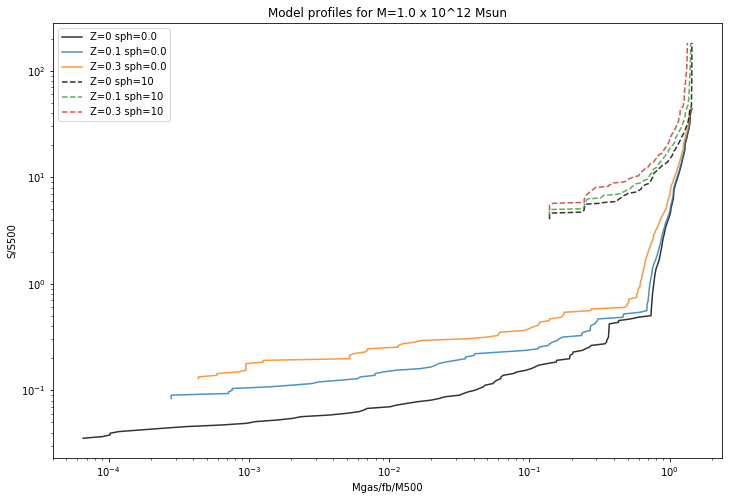

In [10]:
# Figure
pl.figure(figsize=(12, 8))

vsph=[0., 10] # Pre-heating entropy in keV cm^2
vmass=[ 1. ] # Mass of observerd cluster, in units of 10^12 Msun
vz=[0.1, 0.3] # Metallicity, in solar units

# Dictionaries where we will save the data
dmgas = {}
dmgassn = {}
dentropy= {}
dm500 = {}
ds500 = {}

# Plotting line styles
linest=['-','--']

for imass in range(len(vmass)) :

    mfinal = vmass[imass]

    for isph in range(len(vsph)) :
    
        sph = vsph[isph]

        for iz in range(len(vz)) :

            if isph==0 and iz==0 :
                # Create the merger tree:
                clutree1 = Clutree(vmass[imass],zfinal,[], None)
            else :
                clutree1.resetent()

            # Calculate entropy for all clusters in the merger tree
            clutree1.calcent(metallicity=vz[iz], spreheat=sph)

            
            s500 = 105.*(.71874*vmass[imass]/100*.13/fb*(70/h0)**3)**(2./3) / ((1+zfinal)**3.*om+ol)**(1/3)
            m500 = .71874*vmass[imass]

            # save the data
            dmgas[(sph,mfinal,vz[iz])] = np.array(clutree1.mgas)
            dmgassn[(sph,mfinal,vz[iz])] = np.array(clutree1.mgassn)
            dentropy[(sph,mfinal,vz[iz])]= np.array(clutree1.shistplot)
            dm500[(sph,mfinal,vz[iz])] = float(m500)
            ds500[(sph,mfinal,vz[iz])] = float(s500)

            # plot the data
            if iz==0 :
                # No supernova heating. Doesn't depend on metallicity vz
                # Hence, only plot for the first case iz=0
                pl.plot(dmgas[(sph,mfinal,vz[iz])]/fb/dm500[(sph,mfinal,vz[iz])],
                        dentropy[(sph,mfinal,vz[iz])] / ds500[(sph,mfinal,vz[iz])] ,
                        'k', alpha=0.8, ls=linest[isph], 
                        label='Z=0 sph='+str(sph) )

            # with supernova heating
            pl.plot(dmgassn[(sph,mfinal,vz[iz])]/fb/dm500[(sph,mfinal,vz[iz])],
                        dentropy[(sph,mfinal,vz[iz])] / ds500[(sph,mfinal,vz[iz])],
                        alpha=0.8, ls=linest[isph], 
                        label='Z='+str(vz[iz])+' sph='+str(sph) )

pl.loglog()
pl.title('Model profiles for M='+str(vmass[imass])+' x 10^12 Msun')
pl.legend()
pl.xlabel('Mgas/fb/M500')
pl.ylabel('S/S500')

pl.show()

Now, let's compare the above model result to our data. I ran the same model and added the curves from my data (which by the way you can find in machine readable format <a href="https://iopscience.iop.org/article/10.1088/0004-637X/805/1/3">here</a>.) There is a variation in the curves from instance to instance, which comes from the Poisson realizations used to create mergers. 

Here's what the data and the model look like together:

<img src="clutree6_m1_z0103_sph0010_sneff05.png" align="center" width="550" />

This looks promising! At least for the no pre-heating runs, the solid lines. (The fact that a curve stops means that there are no mass elements with entropy lower than this value.) However, this is much smaller than the range of masses observed, which is betwen $10^{14}$ and $10^{15}M_\odot$. And although entropy should scale with the mass of a cluster in a predictible way, driven by the fact that gravity has no preferred scale, when we go down to masses of $\sim 10^{13}M_\odot$ and lower, other forces come into play and change this scaling.

Now let's run this code for masses $10^{14}$ and $10^{15}M_\odot$ and plot data and model together, again.

Below is the plot for the $10^{14}M_\odot$ simulated cluster. The turquoise lines are the entropy profiles measured in real clusters. The lines with different colors are the same $10^{14}M_\odot$ simulated cluster, with different parameters changed for computing its entropy profile. For example the bottom line is for the case of no supernova heating and no pre-heating.

<img src="clutree6_m100_z0103_sph0010_sneff05.png" align="center" width="550" />

Similarly, below is the same plot but for a $10^{15}M_\odot$ simulated cluster.

<img src="clutree6_m1000_z0103_sph0010_sneff05.png" align="center" width="550" />

OK. Clearly, there's more work to be done! So let's look at this more carefully.

## Observations on the Results

A few observations:
- First, we see that the range over which the model shows results extends to larger masses than the observations. That is because X-ray emission does not reach all the way out to the expected radius where would see all the gas mass that is simulated. This means that if we believe the data, we should only look at the range in the x-axis where data and model are both available.
- Let's consider the simplest model subset: where there's only shock heating from gravity, no supernova feedback and no pre-heating. That's the black solid lines in all the plots. Gravity should be the most dominant contributor, which we see at large masses/radii, where all the differences from other processes become relatively small and all curves converge to the gravity-only model. 
    - We notice that the model does not produce enough gas mass elements with the entropy level seen in the data
    - Or, that slope of the curve is too flat compared to that of the data
- Supernova heating level is very uncertain. The increase in entropy from supernova heat $\Delta Q$ is: $S_{post} = S_{pre} \times (1+ \Delta Q / kT_{gas})$. In other words, merger after merger, this could lead to an exponential blow up of entropy value, if we don't know the correct value of $\Delta Q$, which will be a fraction of the total energy by the supernova. I in fact used this fact to lower the fraction of supernova energy that heats the gas to 5%, to avoid such blow up. However, that value was not motivated by any physics.

Preliminary interpretation:
- First, the baseline gravitional shock heating model needs to be improved. The major deficiency, which I suspect is causing this low entropy level is that shock heating is implemented in an asymmetric way. When two clusters merge, it is only the small one that gets shock heated. That makes sense in most mergers because Equation 1 tells that most mergers happen between cluster with very different masses, i.e. $M_1>>M_2$, or to use the same variable as above, $\xi<<1$. However, perhaps this leaves too much gas that sits in the larger sub-clusters that never gets heated. In a real cluster, _some_ of the larger cluster gas will also get heated. This is not accounted for. I have tried, in the past, mixing gas elements to redistribute entropy, which helped alleviate the problem. 


## Playing with the model
Let's attempt to understand what's going on with the calculated entropy. As mentioned above, there two kinds of mass components:
- The subclusters which were created in the merger tree. If we trace these back to the earliest redshift, ``zstart``, they are all gathered in the array ``Clutree.initclu``. Their entropy in the ``.ent`` variable.
- The smoothly accreting mass, whose gas mass elements are saved in the array ``.dmgas`` with entropy saved in ``.ss``

Let's run our model for a cluster of mass $10^{14}M_\odot$ (Ran for roughly 5 minutes on my laptop.) And look at the entropy values of these two components

In [13]:
clutree14 = Clutree(100, 0.3,[], None)


Calculating tree for cluster with
Mass =  100  x 10^12 Msun
Redshift =  0.3



In [14]:
# Calculate entropy (runs for a similar duration):
# this will produce entropy for both SN heating and no SN heating
clutree14.calcent(metallicity=0.3, spreheat=0.)

Entropy calculation:
Preheating level =  0.0 keV cm^2
Metallicity =  0.3



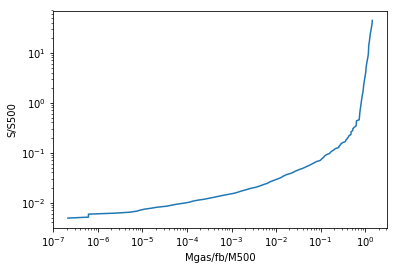

In [18]:
# scaling in the same was as the entropy profiles: 
s500 = 105.*(.71874*100/100*.13/fb*(70/h0)**3)**(2./3) / ((1+0.3)**3.*om+ol)**(1/3)
m500 = .71874*100

# plotting the entropy profiles:
pl.figure()
pl.plot(clutree14.mgas/fb/m500, clutree14.shistplot/s500 )
pl.xlabel('Mgas/fb/M500')
pl.ylabel('S/S500')
pl.loglog()
pl.show()

Now let's plot histograms of the entropy values from the 2 different populations

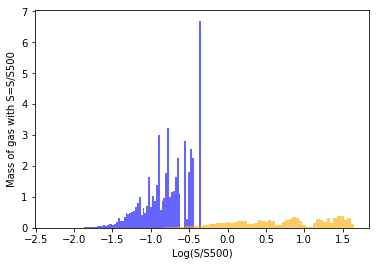

In [28]:
# subcluster entropy:
ent100 = []
m100 = []
for inc in clutree14.initclu : 
    ent100.append(inc.ent)
    m100.append(inc.m0)

# smoothly accreted mass entropy is in clutree15.ss

# plot the histogram of the LOG of subcluster entropy,
# weighted by their masses, in blue
pl.figure()
pl.hist(np.log10(ent100)-np.log10(s500),80, alpha=0.6, color='b', weights=m100)

# overoplot the smooth mass entropy in orange:
pl.hist(np.log10(clutree14.ss)-np.log10(s500),80, alpha=0.6, color='orange', weights=clutree14.dmgas)

pl.xlabel('Log(S/S500)')
pl.ylabel('Mass of gas with S=S/S500')
pl.show()

If we look back at the plot for $M=10^{14}M_\odot$ with both data and model. We can see that the low-entropy population has entropy lower than roughly $S/S_{500} \sim 0.5$, wihch corresponds on this plot to values on the x-axis below -0.3. This lines up perfectly with where the two populations are demarkated! Perhaps, indeed the subclusters are not heated enough, due to the asymmetrical treatment!

## To be continued...